In [4]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from pyecharts.charts import *
from pyecharts import options as opts

import seaborn as sns
sns.set(style = 'darkgrid')
# 设置seaborn的绘图风格，注意该行代码要放在matplotlib参数设置之前，避免中文和负号无法正常显示

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

## 上海租房情况分析

In [6]:
SH=pd.read_csv('链家上海租房数据.csv')
SH.head()

,area,title,position,community,total_price,size
0,静安区,整租·保德路1010弄 2室0厅 南,彭浦,保德路1010弄,4700.0,49.00
1,静安区,整租·柳营路1025弄 2室1厅 南,大宁,柳营路1025弄,6500.0,53.50
2,静安区,整租·达安花园 2室2厅 南,曹家渡,达安花园,13500.0,106.41
3,静安区,整租·皮裘公寓 1室1厅 南,南京西路,皮裘公寓,7500.0,32.00
4,静安区,整租·临汾路1515弄 1室1厅 南,彭浦,临汾路1515弄,3800.0,42.00


In [7]:
SH.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19912 entries, 0 to 19911
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   area         19912 non-null  object 
 1   title        19912 non-null  object 
 2   position     19910 non-null  object 
 3   community    19910 non-null  object 
 4   total_price  19912 non-null  float64
 5   size         19912 non-null  float64
dtypes: float64(2), object(4)
memory usage: 933.5+ KB


In [8]:
#缺失值很少直接进行删除
SH.dropna()    

,area,title,position,community,total_price,size
0,静安区,整租·保德路1010弄 2室0厅 南,彭浦,保德路1010弄,4700.0,49.00
1,静安区,整租·柳营路1025弄 2室1厅 南,大宁,柳营路1025弄,6500.0,53.50
2,静安区,整租·达安花园 2室2厅 南,曹家渡,达安花园,13500.0,106.41
3,静安区,整租·皮裘公寓 1室1厅 南,南京西路,皮裘公寓,7500.0,32.00
4,静安区,整租·临汾路1515弄 1室1厅 南,彭浦,临汾路1515弄,3800.0,42.00
...,...,...,...,...,...,...
19907,青浦,整租·新城逸境园 2室2厅 南,夏阳,新城逸境园,4100.0,90.00
19908,青浦,整租·蟠龙馨苑 3室2厅 南,徐泾,蟠龙馨苑,9000.0,140.00
19909,青浦,整租·金瑞苑 北苑 2室1厅 南,华新,金瑞苑 北苑,4800.0,70.00
19910,青浦,整租·蟠龙馨苑 2室2厅 南/北,徐泾,蟠龙馨苑,5900.0,94.00


In [9]:
# 从标题列提取出户型
SH['户型']= SH.title.str.split(' ').str[1]       

In [10]:
 # 从标题栏提取出租房形式
SH['租房形式']=SH.title.str.split(' ').str[0].str.split('·').str[0] 

In [14]:
SH.sample(5)

,area,title,position,community,total_price,size,户型,租房形式
18170,松江,整租·万达广场(松江) 1室1厅 北,松江大学城,万达广场(松江),3000.0,42.0,1室1厅,整租
9471,浦东新区,整租·乳山三村 1室1厅 南,梅园,乳山三村,6500.0,40.0,1室1厅,整租
12536,杨浦区,整租·北茶园 1室1厅 南,五角场,北茶园,4500.0,46.0,1室1厅,整租
3227,黄埔区,整租·卢湾都市花园 1室2厅 南,五里桥,卢湾都市花园,10000.0,70.0,1室2厅,整租
4814,长宁区,整租·古北国际广场 2室2厅 南/北,古北,古北国际广场,20000.0,135.0,2室2厅,整租


In [15]:
SH.租房形式.value_counts()     

租房形式
整租                     19902
上海青年城                      4
阳光葡提公馆                     2
富民路155号                    1
臻品嘉园(别墅)                   1
华润中央公园二期(陈翔公路1588弄)        1
南山雨果(公寓)                   1
Name: count, dtype: int64

In [16]:
# 提取出需要分析的列
SH=SH[['area','position','total_price','size','户型']]   

In [17]:
# 处理列名
SH=SH.rename(columns={'area':'行政区','total_price':'租金','size':'面积','position':'位置'})

In [16]:
SH.head()

,行政区,位置,租金,面积,户型
0,静安区,彭浦,4700.0,49.00,2室0厅
1,静安区,大宁,6500.0,53.50,2室1厅
2,静安区,曹家渡,13500.0,106.41,2室2厅
3,静安区,南京西路,7500.0,32.00,1室1厅
4,静安区,彭浦,3800.0,42.00,1室1厅


In [19]:
# 描述性统计分析
SH.describe().T

,count,mean,std,min,25%,50%,75%,max
租金,19912.0,9166.156489,12170.817919,1000.0,4600.0,6400.0,9700.0,680000.0
面积,19912.0,93.229735,95.658488,9.0,53.0,80.0,106.0,4200.0


## 大区分析

In [20]:
# 对各区房源数量统计
area = SH.行政区.value_counts()
area

行政区
浦东新区    3000
闵行区     2516
徐汇区     1662
松江      1573
宝山区     1526
静安区     1342
长宁区     1331
普陀区     1312
青浦      1158
嘉定区     1048
杨浦区     1012
黄埔区      882
奉贤       732
虹口区      623
金山区      120
崇明区       75
Name: count, dtype: int64

In [21]:
area.index

Index(['浦东新区', '闵行区', '徐汇区', '松江', '宝山区', '静安区', '长宁区', '普陀区', '青浦', '嘉定区',
       '杨浦区', '黄埔区', '奉贤', '虹口区', '金山区', '崇明区'],
      dtype='object', name='行政区')

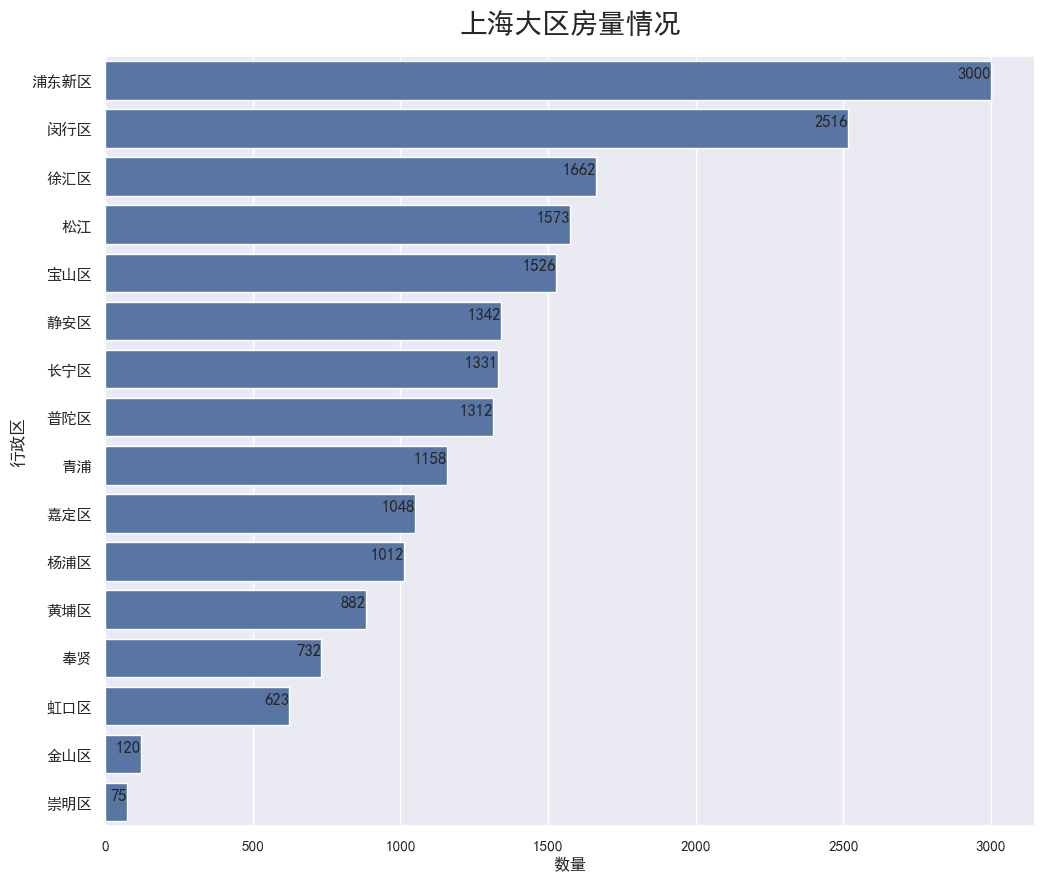

In [27]:
# 绘制条形图，观察区域房源情况
plt.figure(figsize=(12,10))
sns.barplot(y=area.index,x=area)
plt.xlabel('数量')
plt.ylabel('行政区')
plt.title('上海大区房量情况',fontsize=20,y=1.02)
# 显示各个行政区具体的数量
for i,j in enumerate(area):
    plt.text(j,i,str(j),ha='right',va='bottom',fontsize=12)

plt.savefig('上海大区房量情况.png')
plt.show()

In [29]:
# 绘制条形图，观察区域租金情况
area_money = SH.groupby('行政区').租金.mean().sort_values(ascending=False)
area_money

行政区
黄埔区     18612.242630
徐汇区     11696.752106
静安区     11655.953800
长宁区     11599.491360
浦东新区     9641.447667
虹口区      9338.091493
杨浦区      9265.343874
普陀区      9029.097561
青浦       8732.697755
闵行区      8678.494038
松江       6588.877940
宝山区      6006.200524
嘉定区      5110.707061
奉贤       3092.109290
崇明区      2926.666667
金山区      2486.250000
Name: 租金, dtype: float64

In [30]:
# 观察区域租金中位数情况
area_money_line =SH.groupby('行政区')['租金'].median().sort_values(ascending=False)
area_money_line.head()

行政区
黄埔区    12000.0
静安区     8500.0
徐汇区     7800.0
长宁区     7800.0
普陀区     6800.0
Name: 租金, dtype: float64

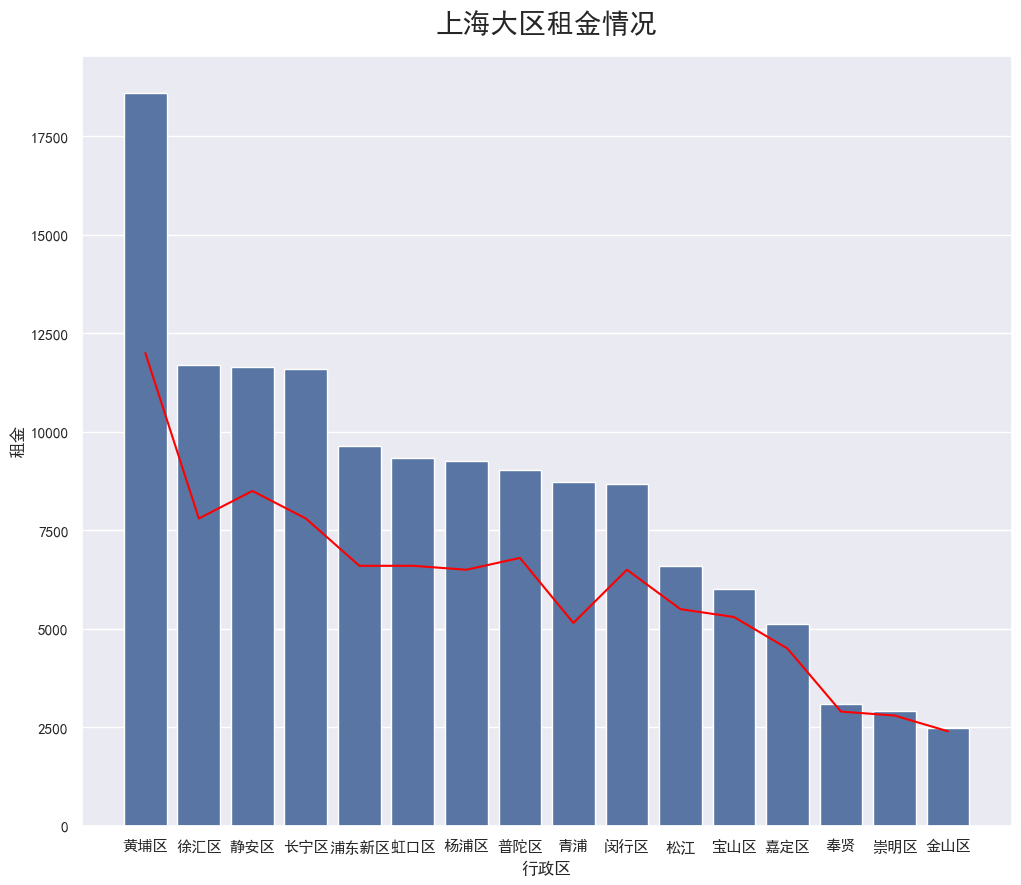

In [32]:
# 绘制条形图，表示租金价格情况
plt.figure(figsize=(12,10))
sns.barplot(y=area_money,x=area_money.index)
sns.lineplot(y=area_money_line,x=area_money_line.index,color='red')
plt.title('上海大区租金情况',fontsize=20,y=1.02)
plt.savefig('上海大区租金情况.png')
plt.show()

## 户型分析

In [39]:
SH.户型.value_counts()

户型
2室1厅          4899
1室1厅          3917
3室2厅          3701
2室2厅          3043
3室1厅          1116
1室0厅           949
4室2厅           909
2室0厅           411
1室2厅           289
5室2厅           208
4室1厅           107
5室3厅            89
4室3厅            58
3室0厅            36
6室3厅            33
3室3厅            23
6室2厅            20
5室1厅            12
7室2厅            11
4室0厅             8
7室3厅             7
4室4厅             6
5室4厅             5
0室1厅             5
北苑               5
5室5厅             4
0室3厅             4
（仙霞西路630弄）       4
9室3厅             3
6室4厅             3
3室5厅             3
8室2厅             3
6室1厅             2
1室3厅             2
7室1厅             2
9室5厅             2
8室0厅             1
6室5厅             1
20室0厅            1
9室2厅             1
南/北              1
14室4厅            1
2室3厅             1
8室3厅             1
8室4厅             1
10室4厅            1
0室0厅             1
南                1
(三期)             1
Name: count, dtype: int64

In [40]:
#  构建一个提取前n个元素的函数
def Tops(户型,n):
    # n就是要提取的前几位
    Top = SH.户型.value_counts().head(n).index
    if 户型 in Top:
        # 如果在前n位
        name = 户型
    else:
        # 不在前n位
        name = '其他'
    return name

In [41]:
# 将尾部户型统一为其他
SH['户型1']=SH.户型.apply(Tops,n=12)

In [42]:
SH.tail()

,行政区,位置,租金,面积,户型,户型1
19907,青浦,夏阳,4100.0,90.0,2室2厅,2室2厅
19908,青浦,徐泾,9000.0,140.0,3室2厅,3室2厅
19909,青浦,华新,4800.0,70.0,北苑,其他
19910,青浦,徐泾,5900.0,94.0,2室2厅,2室2厅
19911,青浦,华新,3800.0,74.0,2室1厅,2室1厅


In [43]:
typeSH = SH.户型1.value_counts().sort_values(ascending=False)
typeSH

户型1
2室1厅    4899
1室1厅    3917
3室2厅    3701
2室2厅    3043
3室1厅    1116
1室0厅     949
4室2厅     909
2室0厅     411
1室2厅     289
其他       274
5室2厅     208
4室1厅     107
5室3厅      89
Name: count, dtype: int64

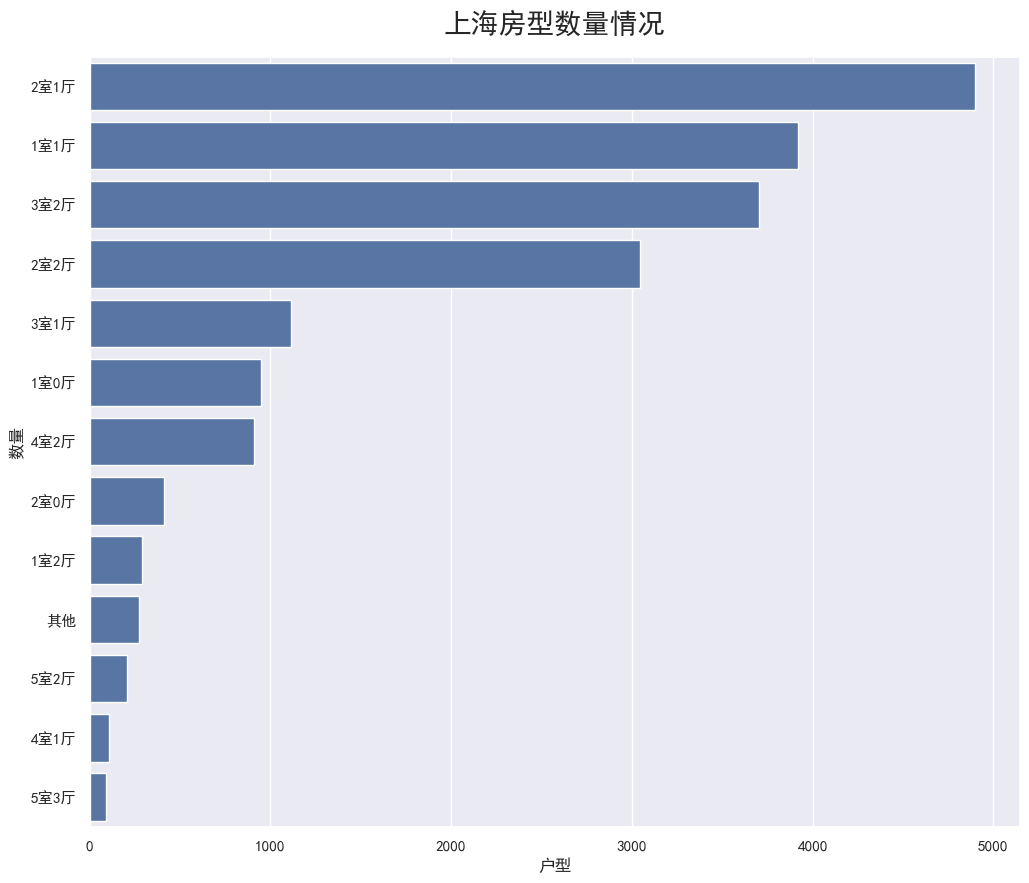

In [44]:
plt.figure(figsize=(12,10))
sns.barplot(x=typeSH,y=typeSH.index)
plt.xlabel('户型')
plt.ylabel('数量')
plt.title('上海房型数量情况',fontsize=20,y=1.02)
plt.savefig('上海房型数量情况.png')
plt.show()

In [45]:
area_money = SH.groupby('户型1').租金.mean().sort_values(ascending=False)
area_money.head()

户型1
5室3厅    31735.202247
其他      27682.405109
5室2厅    27286.048077
4室2厅    22582.066007
3室2厅    12340.695488
Name: 租金, dtype: float64

In [46]:
# 观察区域租金中位数情况
area_money_line =SH.groupby('户型1')['租金'].median().sort_values(ascending=False)
area_money_line.head()

户型1
5室3厅    28000.0
5室2厅    21000.0
4室2厅    17500.0
其他      15000.0
4室1厅     9500.0
Name: 租金, dtype: float64

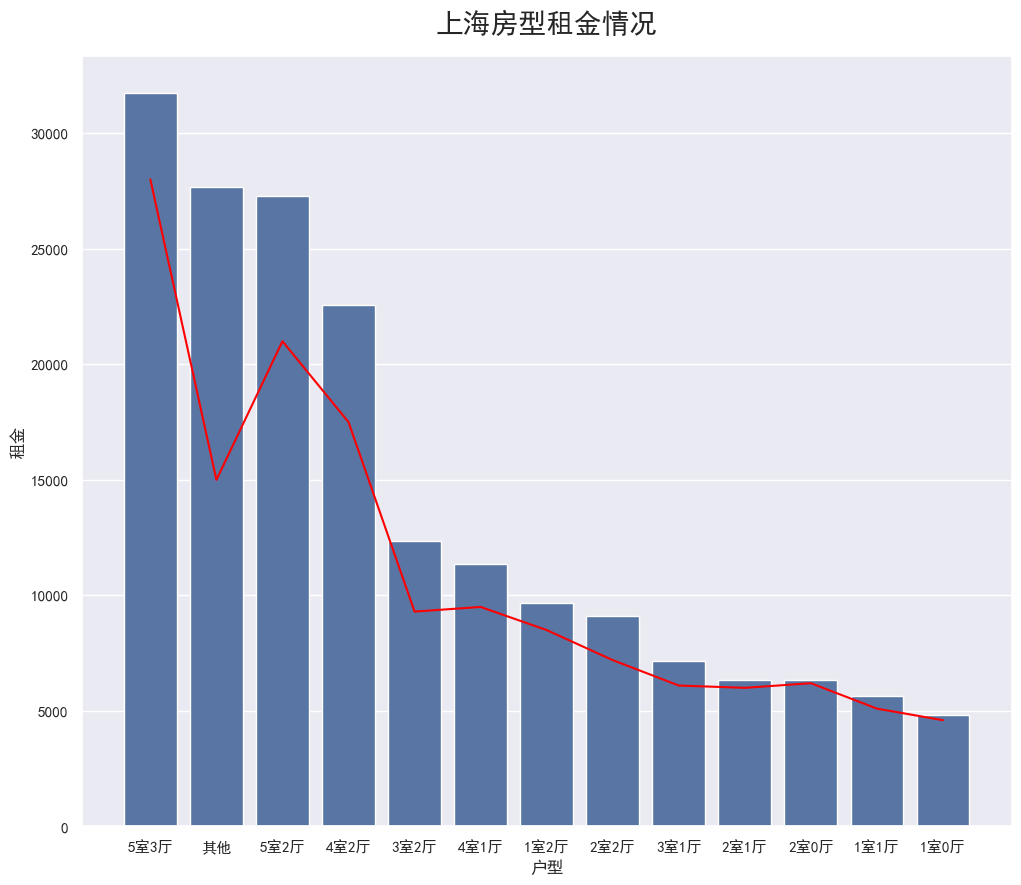

In [48]:
plt.figure(figsize=(12,10))
sns.barplot(y=area_money,x=area_money.index)
sns.lineplot(y=area_money_line,x=area_money_line.index,color='red')
plt.xlabel('户型')
plt.ylabel('租金')
plt.title('上海房型租金情况',fontsize=20,y=1.02)
plt.savefig('上海房型租金情况.png')
plt.show()

In [49]:
df_SH=SH[['租金','面积']].corr()
df_SH          # 正相关

,租金,面积
租金,1.000000,0.445409
面积,0.445409,1.000000


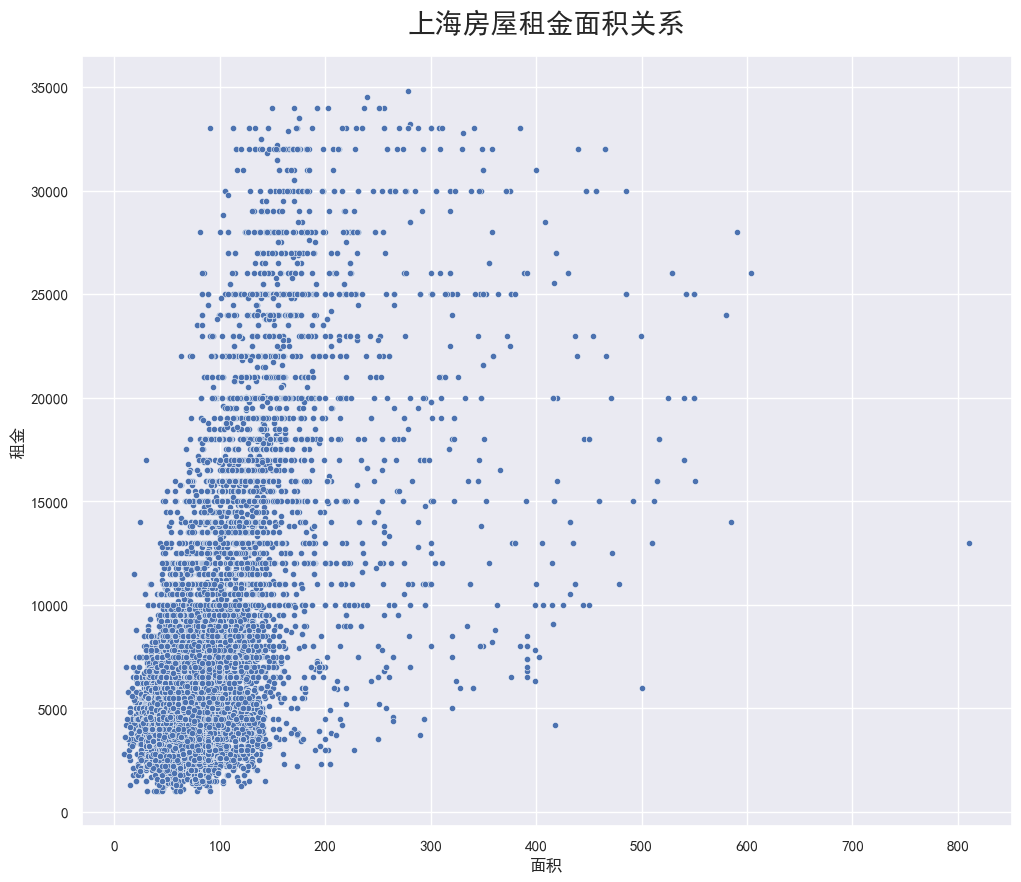

In [50]:
plt.figure(figsize=(12,10))
x=SH[SH['面积']<1800].面积     # 筛选出离群值
y=SH[SH['租金']<35000].租金
sns.scatterplot(x=x,y=y,s=20)
plt.xlabel('面积')
plt.ylabel('租金')
plt.title('上海房屋租金面积关系',fontsize=20,y=1.02)
plt.savefig('上海房屋租金面积关系.png')
plt.show()

## 租金面积分箱

In [51]:
df_SH1=SH[['租金','面积']]
df_SH1.describe()

,租金,面积
count,19912.000000,19912.000000
mean,9166.156489,93.229735
std,12170.817919,95.658488
min,1000.000000,9.000000
25%,4600.000000,53.000000
50%,6400.000000,80.000000
75%,9700.000000,106.000000
max,680000.000000,4200.000000


In [52]:
df_SH1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19912 entries, 0 to 19911
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   租金      19912 non-null  float64
 1   面积      19912 non-null  float64
dtypes: float64(2)
memory usage: 311.3 KB


In [53]:
# 筛选去除离群值
df_SH1=df_SH1[df_SH1['租金']<35000]
df_SH1=df_SH1[df_SH1['面积']<1800]
df_SH1.max()

租金    34800.0
面积      811.0
dtype: float64

In [54]:
# 分箱
df_SH1['面积分布']=pd.cut(df_SH1.面积,bins=[10,30,50,70,90,120,150,300,850])
df_SH1['租金分布']=pd.cut(df_SH1.租金,bins=[1000,2500,4000,5500,7000,8500,10000,12000,15000,35000])

In [55]:
df_SH1.head()

,租金,面积,面积分布,租金分布
0,4700.0,49.00,"(30, 50]","(4000, 5500]"
1,6500.0,53.50,"(50, 70]","(5500, 7000]"
2,13500.0,106.41,"(90, 120]","(12000, 15000]"
3,7500.0,32.00,"(30, 50]","(7000, 8500]"
4,3800.0,42.00,"(30, 50]","(2500, 4000]"


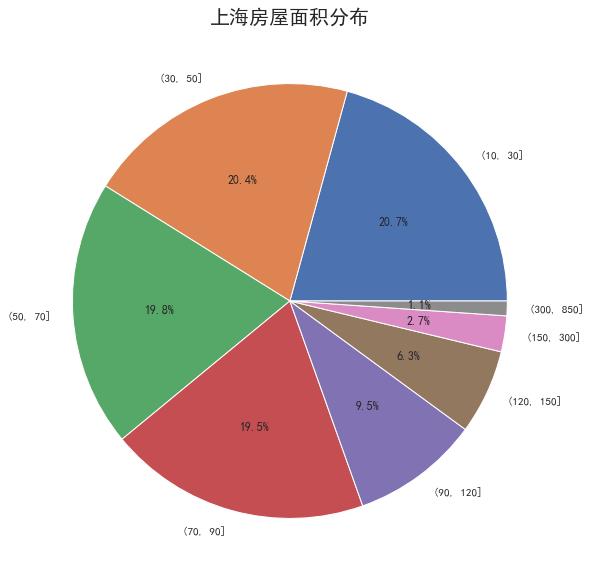

In [522]:
# 绘制饼图
plt.figure(figsize=(12,10))
data=df_SH1.面积分布.value_counts()
plt.pie(data,
        labels=data.index.categories,
        autopct='%.1f%%'
)
plt.title('上海房屋面积分布',fontsize=20)
plt.savefig('上海房屋面积分布.png')
plt.show()

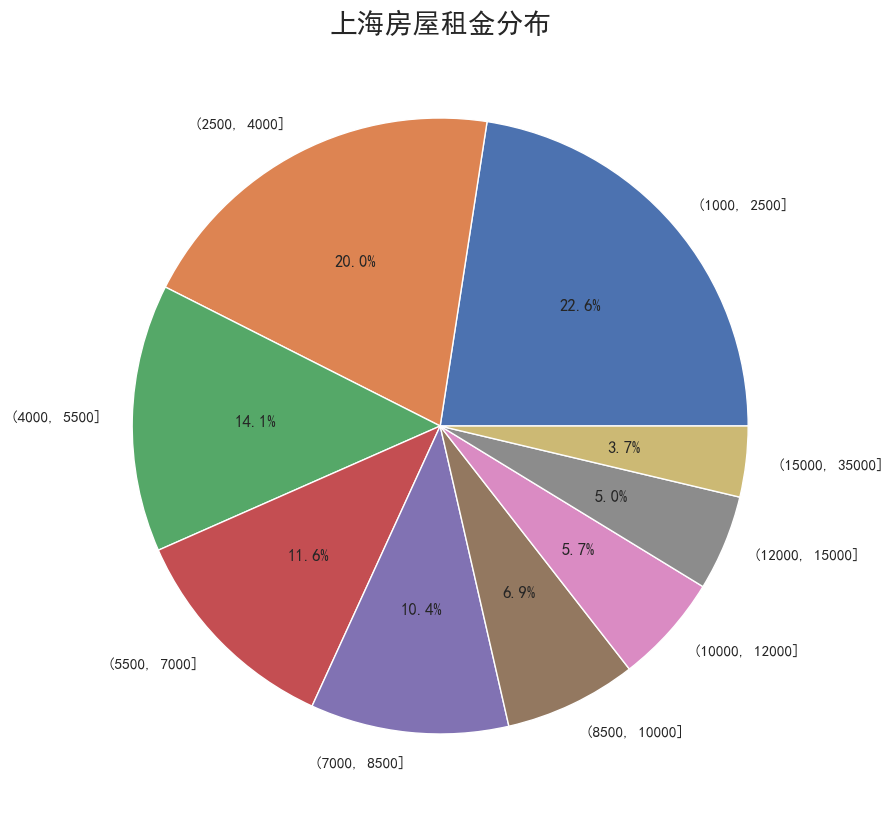

In [56]:
# 绘制饼图
plt.figure(figsize=(12,10))
data=df_SH1.租金分布.value_counts()
plt.pie(data,
        labels=data.index.categories,
        autopct='%.1f%%'
)
plt.title('上海房屋租金分布',fontsize=20)
plt.savefig('上海房屋租金分布.png')
plt.show()

## 模型

In [57]:
SH=SH[SH['租金']<35000]
SH=SH[SH['面积']<1800]
SH['面积分布']=pd.cut(SH.面积,bins=[10,30,50,70,90,120,150,300,850])
SH['租金分布']=pd.cut(SH.租金,bins=[1000,2500,4000,5500,7000,8500,10000,12000,15000,35000])
SH.head()

,行政区,位置,租金,面积,户型,户型1,面积分布,租金分布
0,静安区,彭浦,4700.0,49.00,2室0厅,2室0厅,"(30, 50]","(4000, 5500]"
1,静安区,大宁,6500.0,53.50,2室1厅,2室1厅,"(50, 70]","(5500, 7000]"
2,静安区,曹家渡,13500.0,106.41,2室2厅,2室2厅,"(90, 120]","(12000, 15000]"
3,静安区,南京西路,7500.0,32.00,1室1厅,1室1厅,"(30, 50]","(7000, 8500]"
4,静安区,彭浦,3800.0,42.00,1室1厅,1室1厅,"(30, 50]","(2500, 4000]"


In [59]:
# 对分类变量独热编码
area_onehot=pd.get_dummies(SH.行政区,prefix='大区')
area_onehot.head()

,大区_嘉定区,大区_奉贤,大区_宝山区,大区_崇明区,大区_徐汇区,大区_普陀区,大区_杨浦区,大区_松江,大区_浦东新区,大区_虹口区,大区_金山区,大区_长宁区,大区_闵行区,大区_青浦,大区_静安区,大区_黄埔区
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False


In [60]:
type_onehot=pd.get_dummies(SH.户型1,prefix='户型')
type_onehot.head()

,户型_1室0厅,户型_1室1厅,户型_1室2厅,户型_2室0厅,户型_2室1厅,户型_2室2厅,户型_3室1厅,户型_3室2厅,户型_4室1厅,户型_4室2厅,户型_5室2厅,户型_5室3厅,户型_其他
0,False,False,False,True,False,False,False,False,False,False,False,False,False
1,False,False,False,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,False,False,False
3,False,True,False,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,False,False,False


In [61]:
# 将需要数据连接起来
Data=pd.concat([SH[['租金','面积']],area_onehot,type_onehot],axis=1)
Data.head()

,租金,面积,大区_嘉定区,大区_奉贤,大区_宝山区,大区_崇明区,大区_徐汇区,大区_普陀区,大区_杨浦区,大区_松江,...,户型_2室0厅,户型_2室1厅,户型_2室2厅,户型_3室1厅,户型_3室2厅,户型_4室1厅,户型_4室2厅,户型_5室2厅,户型_5室3厅,户型_其他
0,4700.0,49.00,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
1,6500.0,53.50,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2,13500.0,106.41,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
3,7500.0,32.00,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,3800.0,42.00,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [63]:
Data.to_csv('SH_data.csv')

In [64]:
SH_data=pd.read_csv('SH_data.csv').dropna()
SH_data.head()

,Unnamed: 0,租金,面积,大区_嘉定区,大区_奉贤,大区_宝山区,大区_崇明区,大区_徐汇区,大区_普陀区,大区_杨浦区,...,户型_2室0厅,户型_2室1厅,户型_2室2厅,户型_3室1厅,户型_3室2厅,户型_4室1厅,户型_4室2厅,户型_5室2厅,户型_5室3厅,户型_其他
0,0,4700.0,49.00,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
1,1,6500.0,53.50,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2,2,13500.0,106.41,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
3,3,7500.0,32.00,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,4,3800.0,42.00,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [67]:
SH_data=SH_data.drop('Unnamed: 0',axis=1)
SH_data.head()

KeyError: "['Unnamed: 0'] not found in axis"

In [68]:
SH_data.describe().T.head()

,count,mean,std,min,25%,50%,75%,max
租金,19452.0,8054.430753,5587.287359,1000.0,4500.0,6300.00,9200.0000,34800.0
面积,19452.0,87.037122,53.909288,9.0,52.0,78.03,102.5725,811.0


In [69]:
# 拆分目标变量y和特征变量X
Data_X=Data.drop(['租金'],axis=1)
Data_y=Data.租金

In [70]:
# 数据拆分为测试集和训练集比例为0.2
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(Data_X, 
                                                    Data_y, 
                                                    test_size=0.2, 
                                                    random_state=42)

In [71]:
# 线性回归算法训练
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(train_x,train_y)

LinearRegression()

In [72]:
# 模型预测
test_y_pre=model.predict(test_x)

In [73]:
# 模型评估R2
from sklearn.metrics import r2_score
print(r2_score(test_y,test_y_pre))

0.6130715464813905


In [74]:
# 准确率大概有61 %  

In [75]:
# 随机森林算法训练
from sklearn.ensemble import RandomForestRegressor 
model = RandomForestRegressor() 
model.fit(train_x,train_y)

RandomForestRegressor()

In [76]:
# 模型预测
test_y_pre=model.predict(test_x)

In [77]:
# 模型评估R2
from sklearn.metrics import r2_score
print(r2_score(test_y,test_y_pre))

0.7871855223857461


# 准确率大概有78 %  